Libraries required to run the code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.linear_model import LogisticRegression
from IPython.display import display

Read data from CSV

In [2]:
df = pd.read_csv("data_week2.csv", names=["x1", "x2", "y"], header=None, comment='#')
display(df.head())
x1 = df.iloc[:,0]
x2 = df.iloc[:,1]
x = np.column_stack((x1, x2))
y = df.iloc[:,2]

,x1,x2,y
0,-0.82,-0.67,1
1,-0.95,-0.09,1
2,0.06,0.28,-1
3,-0.06,-0.95,1
4,0.22,0.58,-1


Scatter plot of the loaded data showing x1 andx2 where y=1(+ sign) and y=-1(o sign)

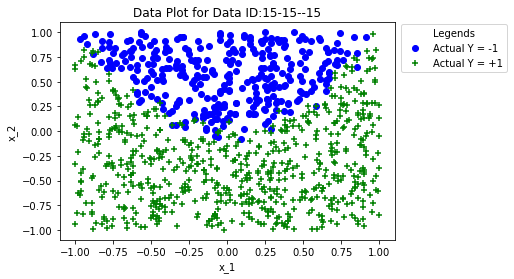

In [3]:
plot.scatter(x1[y == -1], x2[y == -1], color='blue', marker="o")
plot.scatter(x1[y == 1], x2[y == 1], color='green', marker="+")
plot.title('Data Plot for Data ID:15-15--15')
plot.xlabel("x_1")
plot.ylabel("x_2")
plot.legend(['Actual Y = -1', 'Actual Y = +1'], loc = 'lower right', bbox_to_anchor=(1.35, 0.75), title="Legends")
plot.show()

Calculating count of y=1 and y=-1 labels in training data

In [4]:
y_postive = np.count_nonzero(y == 1)
y_negative = np.count_nonzero(y == -1)

actual_df = pd.DataFrame({"Actual Positive":[y_postive], "Actual Negative":[y_negative]})
display(actual_df)

,Actual Positive,Actual Negative
0,675,324


Training Logistic Regression model

In [5]:
LRModel = LogisticRegression(solver='lbfgs', penalty="none")
LRModel.fit(x, y)

LogisticRegression(penalty='none')

Extracting model coefficients and intercept

In [6]:
m1 = LRModel.coef_[0,0]
m2 = LRModel.coef_[0,1]
c = LRModel.intercept_[0]

model_params_df = pd.DataFrame({"Coefficient 1":[m1], "Coefficient 2":[m2], "Intercept":[c]})
display(model_params_df)

,Coefficient 1,Coefficient 2,Intercept
0,0.288599,-5.574721,1.782507


Identifying the decision boundary

In [7]:
x2_dcsn_bndry = []
for i in range(len(x1)) : 
    x2_calc = (-1/m2) * ((m1 * x1[i]) + c)
    x2_dcsn_bndry.append(x2_calc)

Using the trained model to get predictions

In [8]:
prdctns = LRModel.predict(x)

Scatter plot showing Actual VS Predicted value Y label and decsion boundary

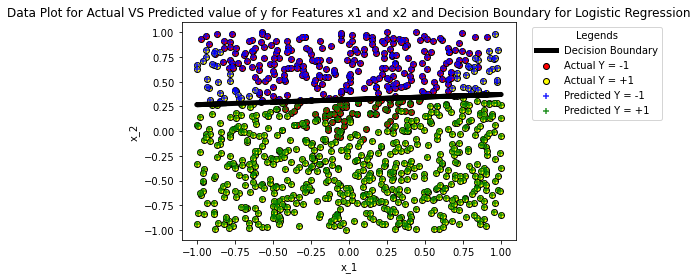

In [9]:
plot.scatter(x1[y == -1], x2[y == -1], color='red', marker="o", edgecolors="black")
plot.scatter(x1[y == 1], x2[y == 1], color='yellow', marker="o", edgecolors="black")
plot.scatter(x1[prdctns == -1], x2[prdctns == -1], color='blue', marker="+", alpha=0.85)
plot.scatter(x1[prdctns == 1], x2[prdctns == 1], color='green', marker="+", alpha=0.85)
plot.plot(x1, x2_dcsn_bndry, linewidth = 5, color = "black")
plot.title('Data Plot for Actual VS Predicted value of y for Features x1 and x2 and Decision Boundary for Logistic Regression')
plot.xlabel("x_1")
plot.ylabel("x_2")
plot.legend(['Decision Boundary', 'Actual Y = -1', 'Actual Y = +1', 'Predicted Y = -1', 'Predicted Y = +1'], title="Legends", loc = 'lower right', bbox_to_anchor=(1.45, 0.53))
plot.show()

Evaluating performance of the model

In [10]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for i in range(len(y)) : 
    if y[i] == 1 and prdctns[i] == 1 : 
        true_positive += 1
    elif y[i] == -1 and prdctns[i] == -1 :
        true_negative += 1
    elif y[i] == 1 and prdctns[i] == -1 :
        false_negative += 1
    elif y[i] == -1 and prdctns[i] == 1 :
        false_positive += 1

Accuracy = ((true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)) * 100

y_pos_1_correctly_predicted = (true_positive/y_postive)*100

y_neg_1_correctly_predicted = (true_negative/y_negative)*100

actual_predicted_df = pd.DataFrame({"True Positive":[true_positive], "True Negative":[true_negative], "False Positive":[false_positive], "False Negative":[false_negative], "Accuracy":[Accuracy], "Label Y = 1 Accuracy":[y_pos_1_correctly_predicted], "Label Y = -1 Accuracy":[y_neg_1_correctly_predicted]})
display(actual_predicted_df)

,True Positive,True Negative,False Positive,False Negative,Accuracy,Label Y = 1 Accuracy,Label Y = -1 Accuracy
0,613,249,75,62,86.286286,90.814815,76.851852
